In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Libraries Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Setting views


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [7]:
# !pip install pycaret -q
# from pycaret.anomaly import *

### Data Loading


In [8]:
data = pd.read_csv('/content/drive/MyDrive/PG Thappar - CSE/Data Science Foundation/DSF-Labs/Real-Estate/Data/Gurgaon_property_data_final_v0_for_EDA.csv')
data.head(2)

,property_name,property_type,society,price,area,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,airport,station,hospitals,banks,malls,educational_institutes,has_lift,has_swimming_pool,has_security_alarm,has_gym,has_park,has_parking,has_water_storage,status,avgRating,Modular Kitchen,Bed,Washing Machine,TV,Stove,Sofa,Fridge,Microwave,Dining Table,Water Purifier,Wardrobe,Curtains,Chimney,AC,Light,Geyser,Exhaust Fan,Fan,sector
0,3 BHK Flat in Sector 36 Sohna,flat,signature global park 4,0.82,1081.0,3,2,2,not available,"144, Sector 36 Sohna, Gurgaon, Haryana",2.0,NaN,True,True,1.0,0.0,2.0,3.0,False,False,False,False,True,False,False,constructed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36
1,2 BHK Flat in Sector 89 Gurgaon,flat,smart world gems,0.95,1105.0,2,2,2,"study room,servant room","O 118d, Sector 89 Gurgaon, Gurgaon, Haryana",4.0,NaN,False,True,1.0,0.0,1.0,2.0,False,True,False,True,True,False,False,underConstruction,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89


### Pre-Processing

In [9]:
# We still have NaN values : % of nan values
data.isna().sum()/data.shape[0]*100

property_name              0.000000
property_type              0.000000
society                    0.025374
price                      0.000000
area                       0.000000
bedRoom                    0.000000
bathroom                   0.000000
balcony                    0.000000
additionalRoom             0.000000
address                    0.279117
floorNum                   0.532860
facing                    29.713271
airport                    5.227100
station                    5.227100
hospitals                  5.227100
banks                      5.227100
malls                      5.227100
educational_institutes     5.227100
has_lift                  17.888861
has_swimming_pool         17.888861
has_security_alarm        17.888861
has_gym                   17.888861
has_park                  17.888861
has_parking               17.888861
has_water_storage         17.888861
status                     0.000000
avgRating                 11.367673
Modular Kitchen           26

In [10]:
data.columns

Index(['property_name', 'property_type', 'society', 'price', 'area', 'bedRoom',
       'bathroom', 'balcony', 'additionalRoom', 'address', 'floorNum',
       'facing', 'airport', 'station', 'hospitals', 'banks', 'malls',
       'educational_institutes', 'has_lift', 'has_swimming_pool',
       'has_security_alarm', 'has_gym', 'has_park', 'has_parking',
       'has_water_storage', 'status', 'avgRating', 'Modular Kitchen', 'Bed',
       'Washing Machine', 'TV', 'Stove', 'Sofa', 'Fridge', 'Microwave',
       'Dining Table', 'Water Purifier', 'Wardrobe', 'Curtains', 'Chimney',
       'AC', 'Light', 'Geyser', 'Exhaust Fan', 'Fan', 'sector'],
      dtype='object')

### EDA

#### Univariate Analysis

##### Price


In [11]:
# Price data is in Crores
data.price.describe()

count    3941.000000
mean        2.475499
std         2.922570
min         0.070000
25%         0.900000
50%         1.500000
75%         2.650000
max        31.500000
Name: price, dtype: float64

<Axes: >

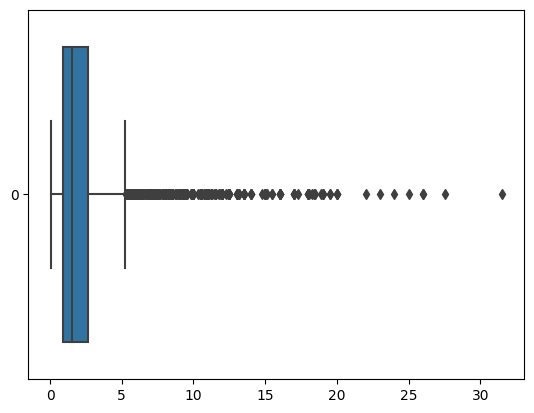

In [12]:
sns.boxplot(data.price, orient='h')

In [13]:
data['price'].quantile(0.25)

0.9

In [ ]:
data['price'].shape[0]*0.25, data[data['price']<=0.9].shape[0]

(985.25, 991)

In [ ]:
# Calculate the IQR (Interquartile Range)
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for identifying outliers
# Typically, outliers are values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR
print(lower_threshold, upper_threshold)

# Filter the DataFrame to see data which are outliers
data[(data['price'] < lower_threshold) | (data['price'] > upper_threshold)].shape


-1.725 5.275


(447, 46)

<Axes: xlabel='price', ylabel='Count'>

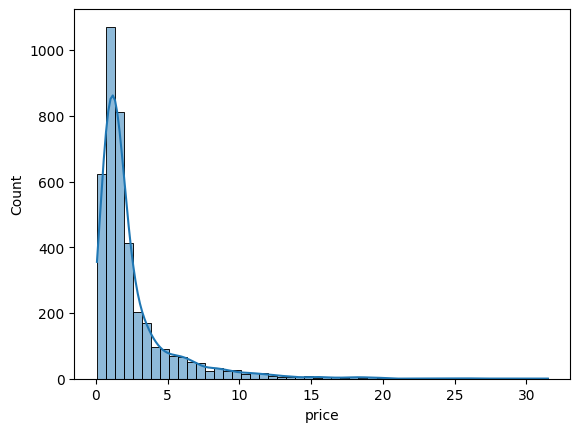

In [ ]:

# Create a distribution plot (histogram)
sns.histplot(data=data.price, bins=50, kde=True)

* There are outliers in price column. About 447 data points which are above upper thresolds.

#####  Property Type

In [ ]:
data.property_type.value_counts()

flat     2996
house     945
Name: property_type, dtype: int64

<Axes: xlabel='property_type', ylabel='count'>

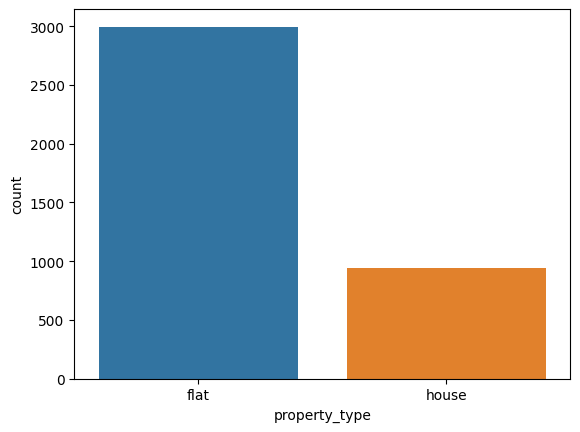

In [ ]:
sns.countplot(data=data, x='property_type')

##### Society

In [14]:
data['society'].isnull().sum()


1

In [15]:
data.society.nunique()

723

In [16]:
data.society.value_counts()/data.society.shape[0]*100

independent                                          14.260340
tulip violet                                          1.903070
ss the leaf                                           1.877696
shapoorji pallonji joyville gurugram                  1.141842
dlf new town heights                                  1.065719
signature global park                                 0.938848
shree vardhman victoria                               0.888099
smart world gems                                      0.837351
smart world orchard                                   0.837351
emaar mgf emerald floors premier                      0.811977
dlf the ultima                                        0.786602
paras dews                                            0.786602
m3m woodshire                                         0.761228
dlf regal gardens                                     0.761228
shree vardhman flora                                  0.735854
la vida by tata housing                               0

In [17]:
data[data.society!='independent'].society.value_counts()

tulip violet                                         75
ss the leaf                                          74
shapoorji pallonji joyville gurugram                 45
dlf new town heights                                 42
signature global park                                37
shree vardhman victoria                              35
smart world orchard                                  33
smart world gems                                     33
emaar mgf emerald floors premier                     32
dlf the ultima                                       31
paras dews                                           31
dlf regal gardens                                    30
m3m woodshire                                        30
shree vardhman flora                                 29
la vida by tata housing                              28
signature global solera                              27
godrej nature plus                                   27
emaar gurgaon greens                            

Text(0, 0.5, 'Frequency')

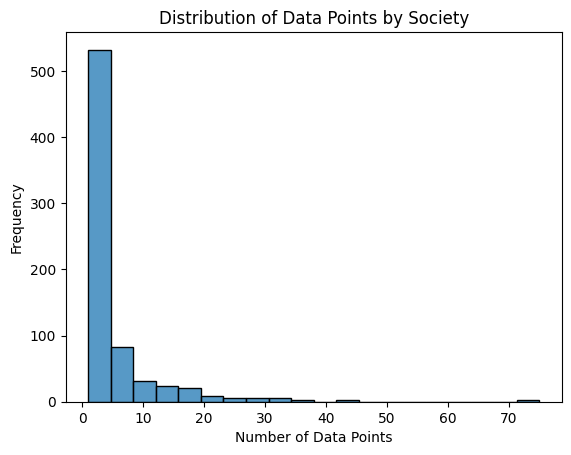

In [18]:
# Count the number of data points for each society
society_counts = data[data.society!='independent'].society.value_counts()

counts, bin_edges = np.histogram(society_counts, bins=20)


# Create a distribution plot (histogram)
sns.histplot(data=society_counts, bins=20)

# Customize the plot (optional)
plt.title('Distribution of Data Points by Society')
plt.xlabel('Number of Data Points')
plt.ylabel('Frequency')

<Axes: >

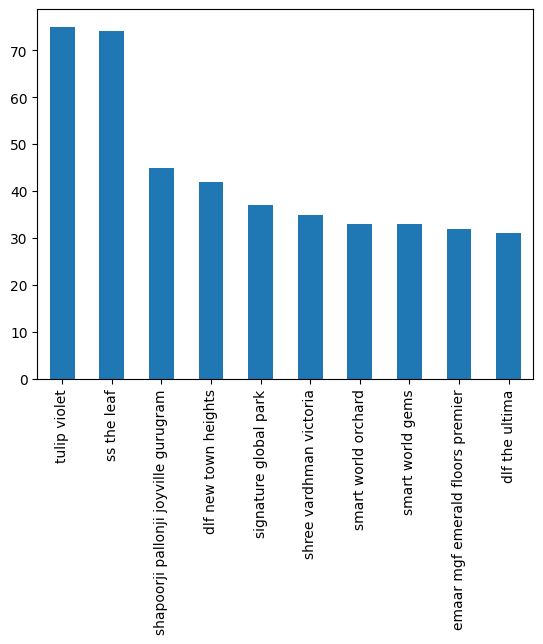

In [19]:
data[data['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')


Observations
- Around 14% properties comes under independent tag.
- There are 723 societies.


##### Sector

In [ ]:
data['sector']=data.SECTOR
data.drop(columns=['SECTOR'], inplace=True)

In [ ]:
data['sector'].value_counts().shape


(137,)

<Axes: >

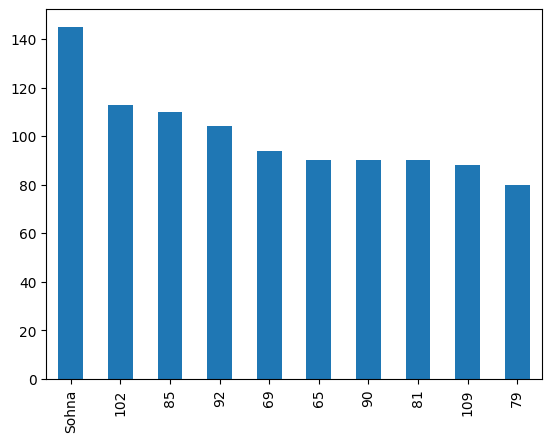

In [ ]:
# Visualise Top 10 sectors
data['sector'].value_counts().head(10).plot(kind='bar')

In [ ]:
# Frequency distribution for sectors
sector_counts = data['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': 4,
 'High (50-100)': 21,
 'Average (10-49)': 57,
 'Low (2-9)': 42,
 'Very Low (1)': 13}

Observations
- There are a total of 104 unique sectors in the dataset.
- Frequency distribution of sectors:
  - Very High (>100): 4 sectors have more than 100 listings.
  - High (50-100): 21 sectors have between 50 to 100 listings.
  - Average (10-49): A majority, 57 sectors, fall in this range with 10 to 49 listings each.
  - Low (2-9): 42 sectors have between 2 to 9 listings.
  - Very Low (1): there are 13 sectors with only 1 listing.

##### Area

In [ ]:
# 8 -Number Summary
data.area.describe().astype('float')

count    3.941000e+03
mean     4.647026e+03
std      1.175856e+05
min      4.500000e+01
25%      1.187000e+03
50%      1.700000e+03
75%      2.290000e+03
max      7.250000e+06
Name: area, dtype: float64

<Axes: >

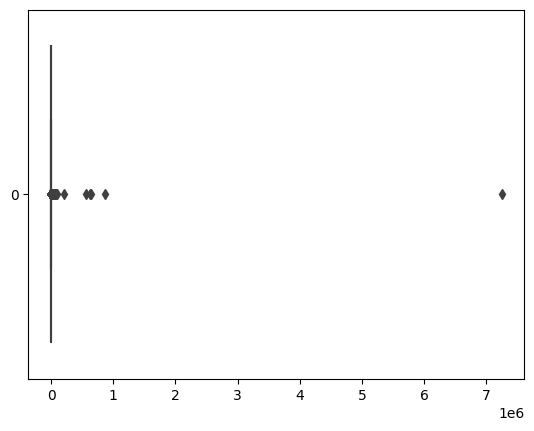

In [ ]:
sns.boxplot(data.area, orient='h')

<Axes: xlabel='area', ylabel='Count'>

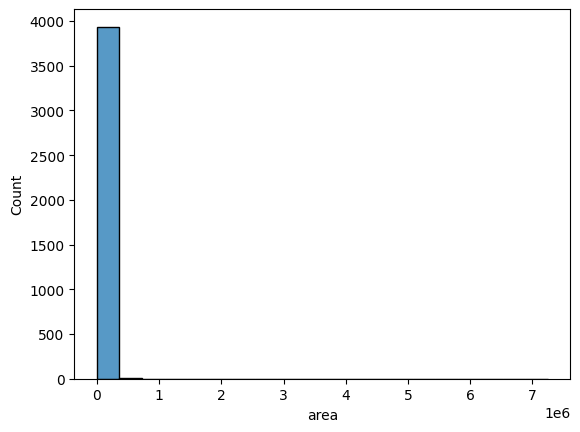

In [ ]:

# Create a distribution plot (histogram)
sns.histplot(data=data.area, bins=20)

##### BedRoom

In [ ]:
#
data.bedRoom.isna().sum()

0

<Axes: >

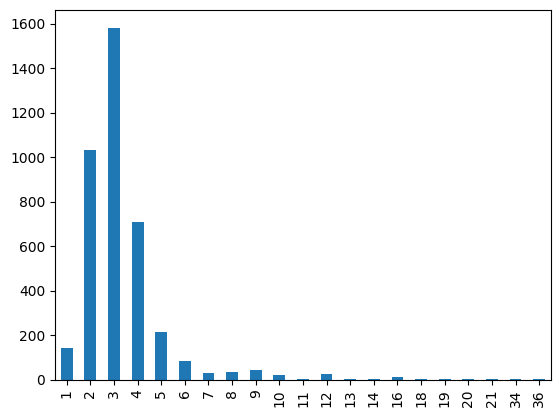

In [ ]:
data['bedRoom'].value_counts().sort_index().plot(kind='bar')


<Axes: ylabel='bedRoom'>

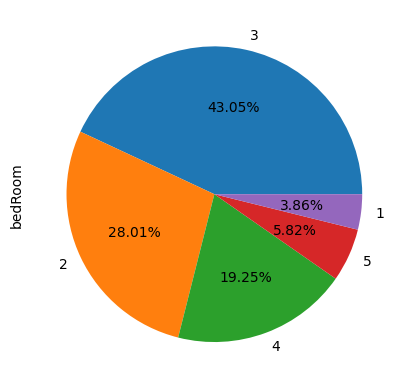

In [ ]:
data['bedRoom'].value_counts(normalize=True).head().plot(kind='pie', autopct='%0.2f%%')

##### BathRoom

In [ ]:
#
data.bathroom.isna().sum()

0

<Axes: >

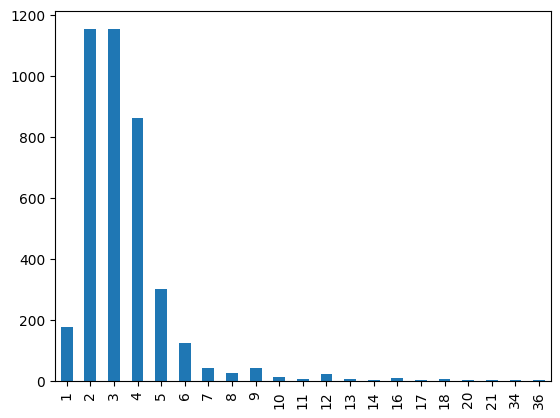

In [ ]:
data['bathroom'].value_counts().sort_index().plot(kind='bar')


<Axes: ylabel='bathroom'>

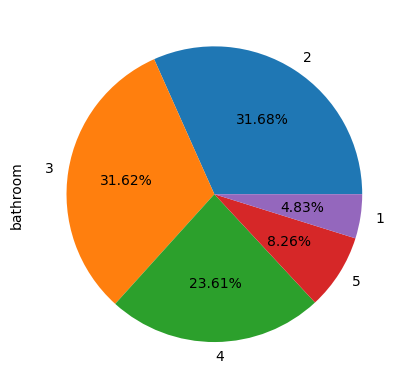

In [ ]:
data['bathroom'].value_counts(normalize=True).head().plot(kind='pie', autopct='%0.2f%%')

##### Balcony

In [ ]:
#
data.balcony.isna().sum()

0

<Axes: >

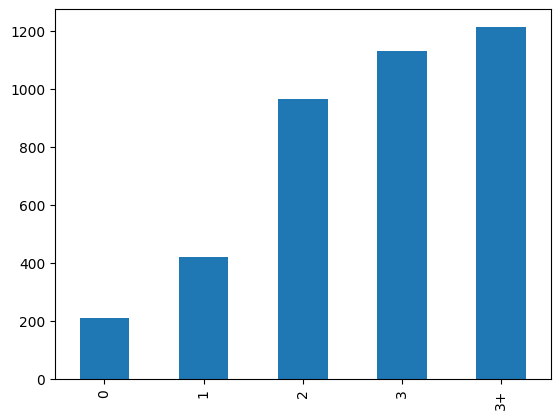

In [ ]:
data['balcony'].value_counts().sort_index().plot(kind='bar')


<Axes: ylabel='balcony'>

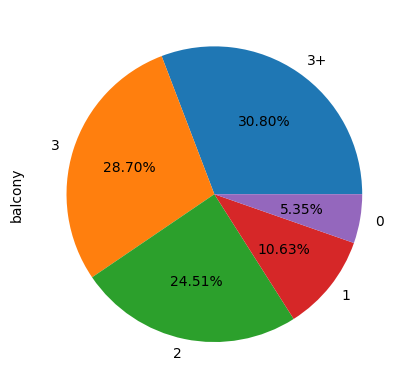

In [ ]:
data['balcony'].value_counts(normalize=True).head().plot(kind='pie', autopct='%0.2f%%')

##### FloorNum

In [ ]:
# Checking Nan Values
data.floorNum.isna().sum()

21

In [ ]:
# Flat
data[data.property_type=='flat']['floorNum'].describe()

count    2994.000000
mean        7.899800
std         6.198842
min         0.000000
25%         3.000000
50%         7.000000
75%        11.000000
max        45.000000
Name: floorNum, dtype: float64

In [ ]:
# House
data[data.property_type=='house']['floorNum'].describe()

count    926.000000
mean       2.759179
std        2.949906
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       51.000000
Name: floorNum, dtype: float64

<Axes: >

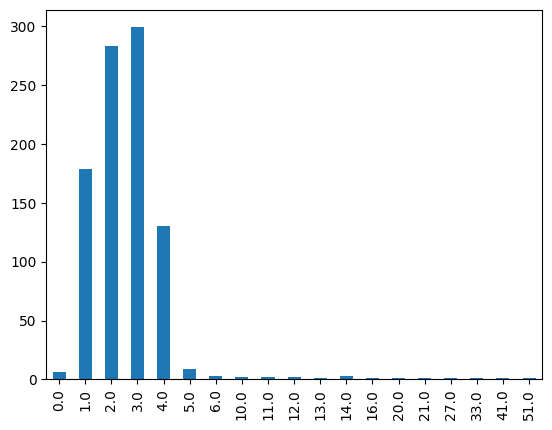

In [ ]:
# For House
data[data.property_type=='house']['floorNum'].value_counts().sort_index().plot(kind='bar')


<Axes: >

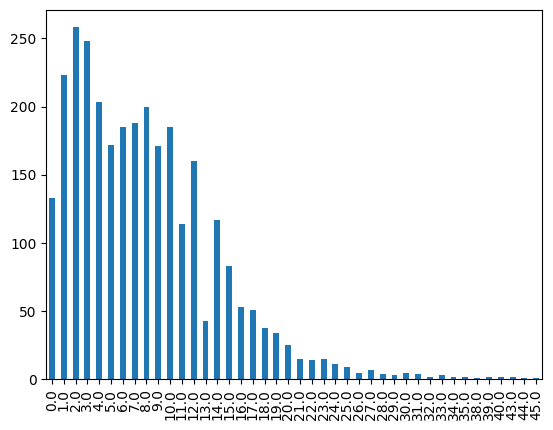

In [ ]:
# For Flats
data[data.property_type=='flat']['floorNum'].value_counts().sort_index().plot(kind='bar')


<Axes: ylabel='floorNum'>

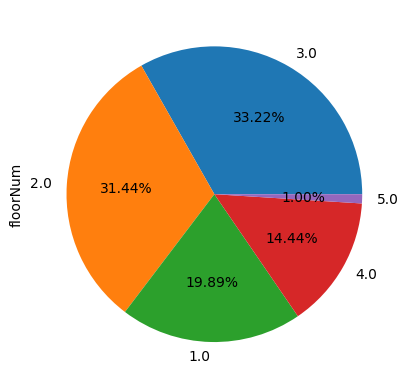

In [ ]:
# For House
data[data.property_type=='house']['floorNum'].value_counts(normalize=True).head().plot(kind='pie', autopct='%0.2f%%')

<Axes: ylabel='floorNum'>

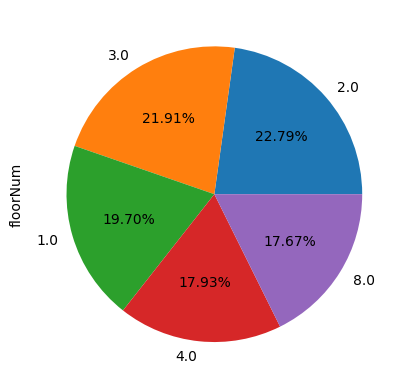

In [ ]:
# For flat
data[data.property_type=='flat']['floorNum'].value_counts(normalize=True).head().plot(kind='pie', autopct='%0.2f%%')

##### Status

- Status of the property [constructed or underConstructed]

In [ ]:
# Missing values
data.status.isna().sum()

0

In [ ]:
data.status.value_counts()

constructed          3243
underConstruction     697
undefined               1
Name: status, dtype: int64

In [ ]:
data.at[2449, 'status'] = 'underConstruction'

<Axes: >

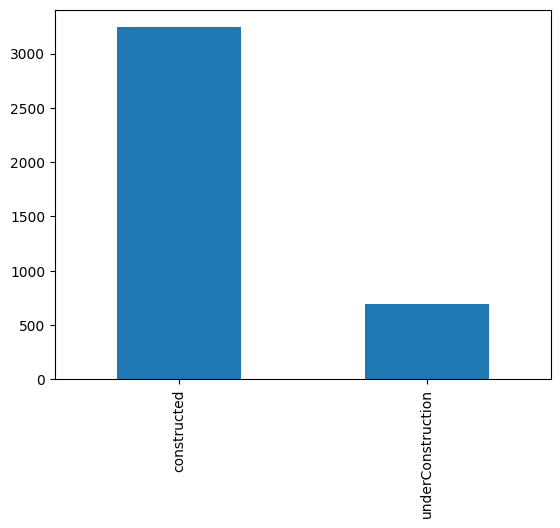

In [ ]:
data.status.value_counts().sort_index().plot(kind='bar')

In [ ]:
features_columns = ['airport', 'station', 'hospitals', 'banks', 'malls', 'educational_institutes', 'has_lift', 'has_swimming_pool','has_security_alarm', 'has_gym', 'has_park', 'has_parking',
       'has_water_storage', 'Modular Kitchen', 'Bed', 'Washing Machine', 'TV', 'Stove', 'Sofa', 'Fridge', 'Microwave', 'Dining Table', 'Water Purifier', 'Wardrobe', 'Curtains', 'Chimney',
       'AC', 'Light', 'Geyser', 'Exhaust Fan', 'Fan']

In [ ]:
data[features_columns].head()

,airport,station,hospitals,banks,malls,educational_institutes,has_lift,has_swimming_pool,has_security_alarm,has_gym,has_park,has_parking,has_water_storage,Modular Kitchen,Bed,Washing Machine,TV,Stove,Sofa,Fridge,Microwave,Dining Table,Water Purifier,Wardrobe,Curtains,Chimney,AC,Light,Geyser,Exhaust Fan,Fan
0,True,True,1.0,0.0,2.0,3.0,False,False,False,False,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,False,True,1.0,0.0,1.0,2.0,False,True,False,True,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,True,True,1.0,0.0,1.0,2.0,False,False,False,False,True,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,False,True,1.0,1.0,3.0,1.0,False,False,True,False,True,True,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,True,False,1.0,0.0,1.0,2.0,False,True,True,True,True,True,True,1,No,No,No,No,No,No,No,No,No,3,4,1,5,15,3,1,6


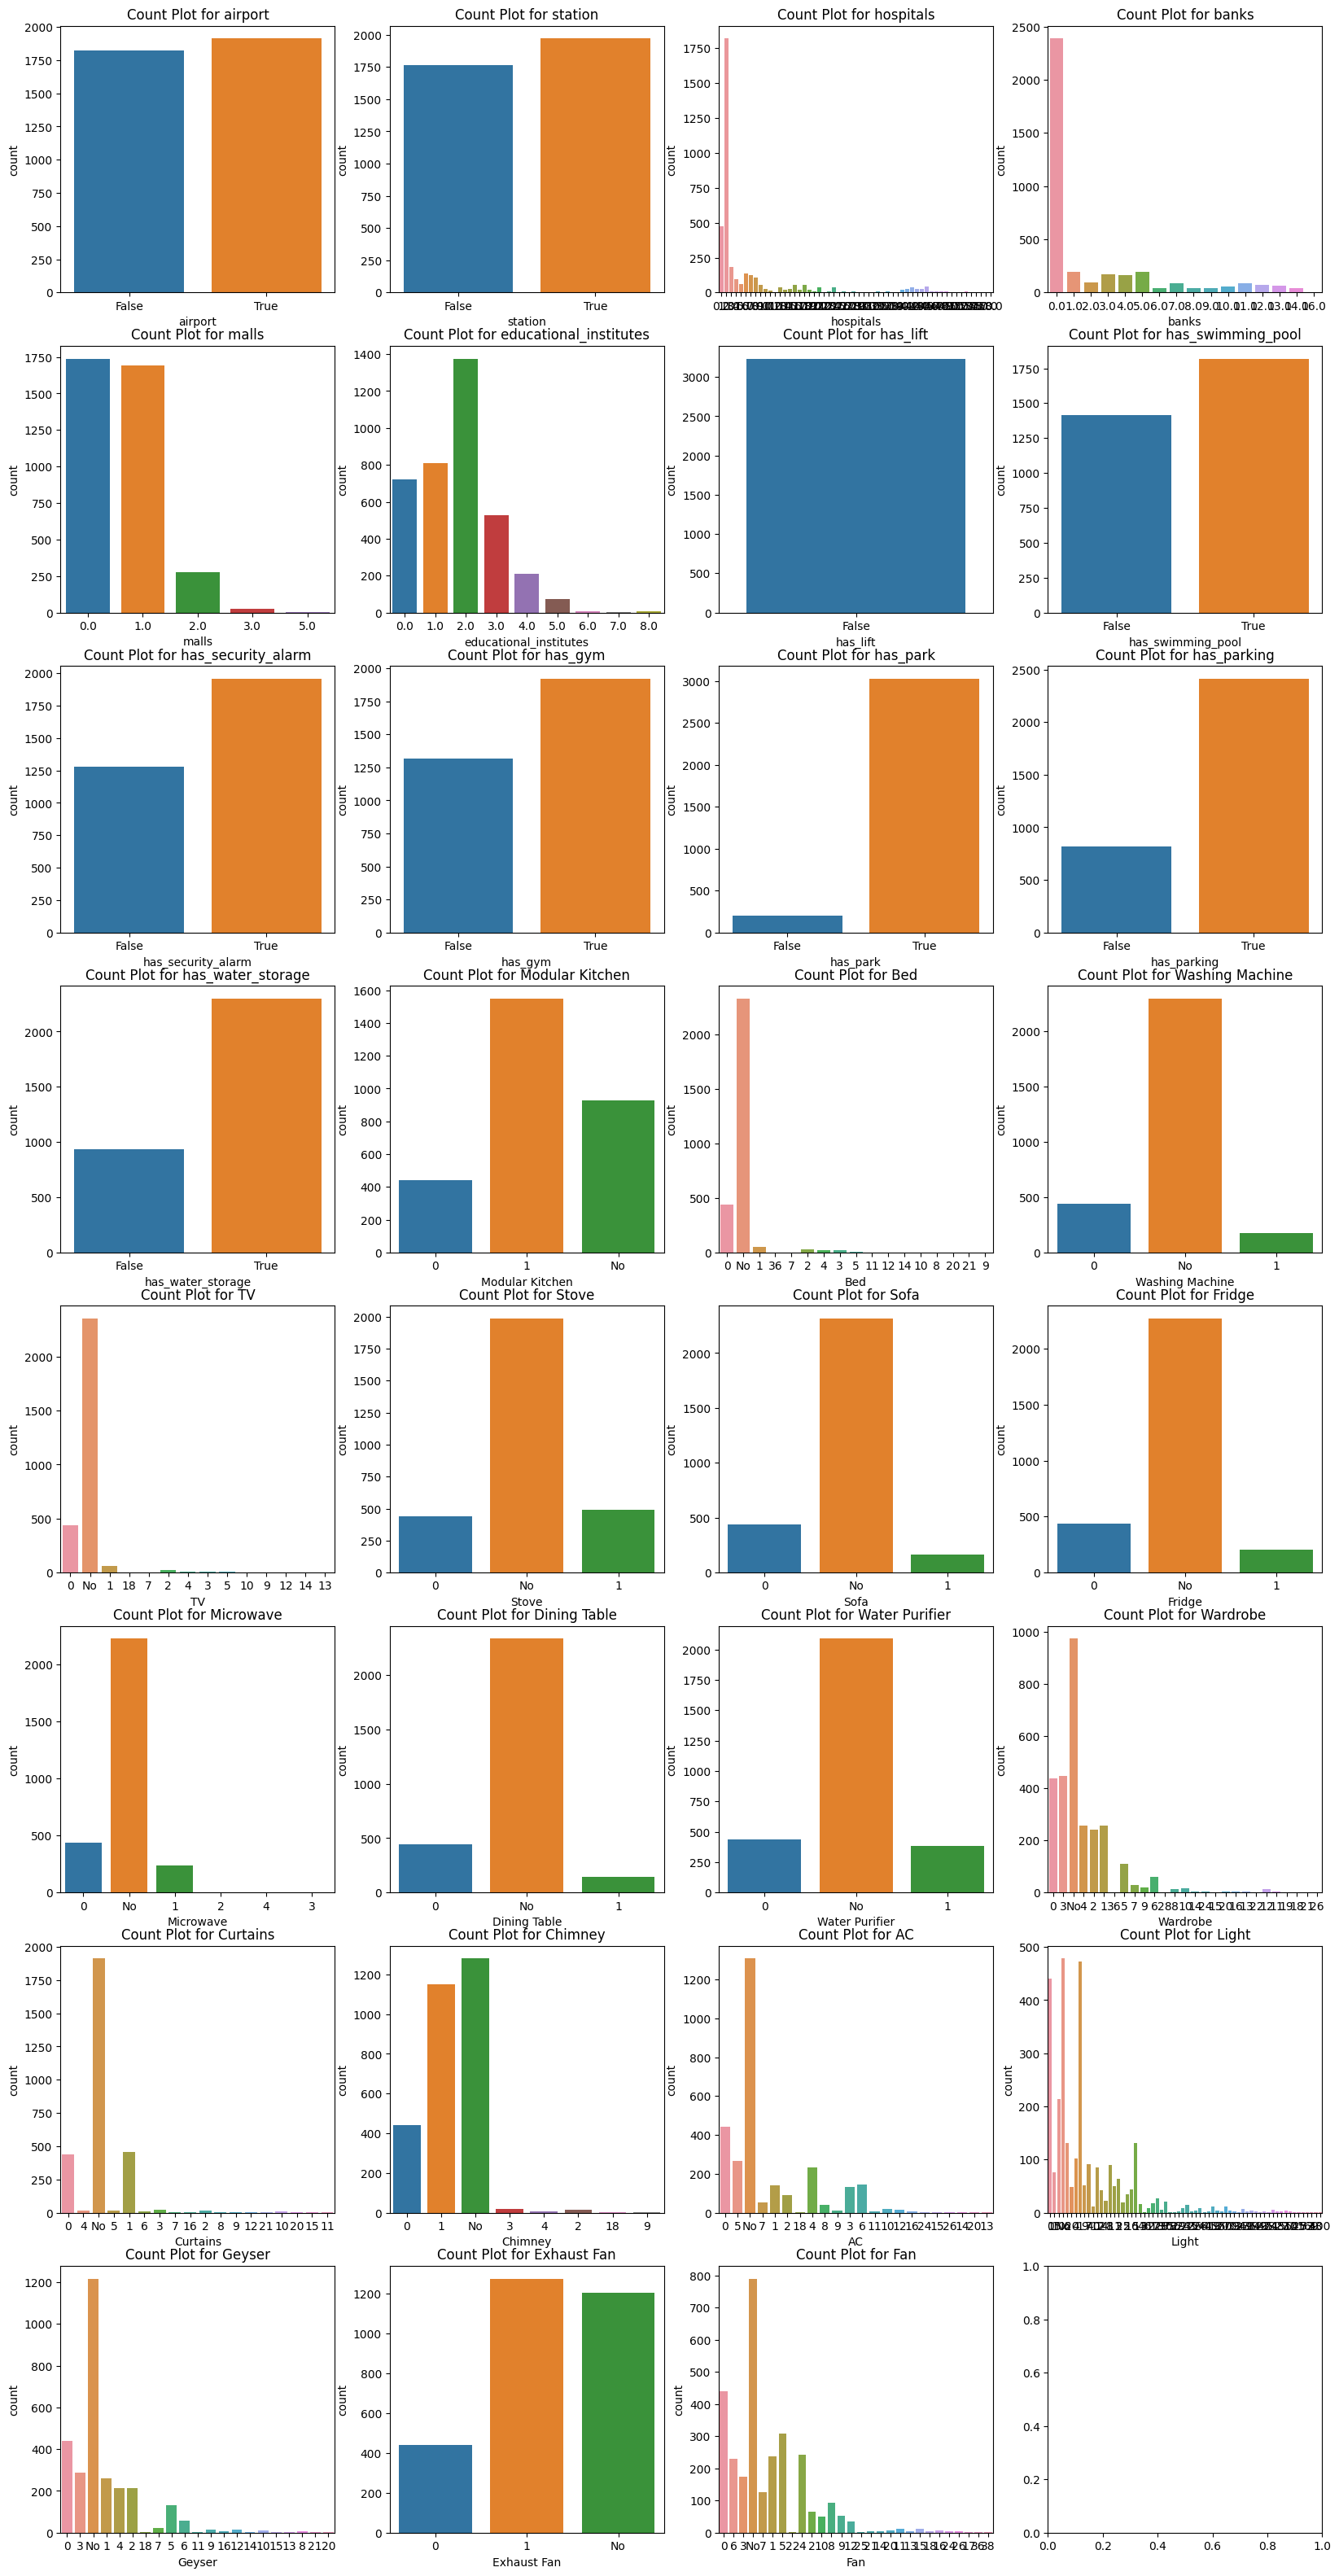

In [ ]:
import math

# Calculate the number of rows needed
num_cols = len(features_columns)
num_plots_per_row = 4  # Maximum of 4 plots per row
num_rows = math.ceil(num_cols / num_plots_per_row)

# Create subplots with the calculated number of rows and 4 plots per row
fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(num_plots_per_row * 5, num_rows * 5))


# Flatten the axes array if there's only one row
if num_rows == 1:
    axes = axes.reshape(1, -1)

# Create count plots for each feature
for i, col in enumerate(features_columns):
    row_index = i // num_plots_per_row
    col_index = i % num_plots_per_row
    sns.countplot(data=data, x=col, ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'Count Plot for {col}')

In [ ]:
data.columns

Index(['property_name', 'property_type', 'society', 'price', 'area', 'bedRoom',
       'bathroom', 'balcony', 'additionalRoom', 'address', 'floorNum',
       'facing', 'airport', 'station', 'hospitals', 'banks', 'malls',
       'educational_institutes', 'has_lift', 'has_swimming_pool',
       'has_security_alarm', 'has_gym', 'has_park', 'has_parking',
       'has_water_storage', 'status', 'avgRating', 'Modular Kitchen', 'Bed',
       'Washing Machine', 'TV', 'Stove', 'Sofa', 'Fridge', 'Microwave',
       'Dining Table', 'Water Purifier', 'Wardrobe', 'Curtains', 'Chimney',
       'AC', 'Light', 'Geyser', 'Exhaust Fan', 'Fan', 'sector'],
      dtype='object')

#### Categorical columns vs Price

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns

Index(['property_name', 'property_type', 'society', 'balcony',
       'additionalRoom', 'address', 'facing', 'airport', 'station', 'has_lift',
       'has_swimming_pool', 'has_security_alarm', 'has_gym', 'has_park',
       'has_parking', 'has_water_storage', 'SECTOR', 'status',
       'Modular Kitchen', 'Bed', 'Washing Machine', 'TV', 'Stove', 'Sofa',
       'Fridge', 'Microwave', 'Dining Table', 'Water Purifier', 'Wardrobe',
       'Curtains', 'Chimney', 'AC', 'Light', 'Geyser', 'Exhaust Fan', 'Fan'],
      dtype='object')

<Axes: xlabel='property_type', ylabel='price'>

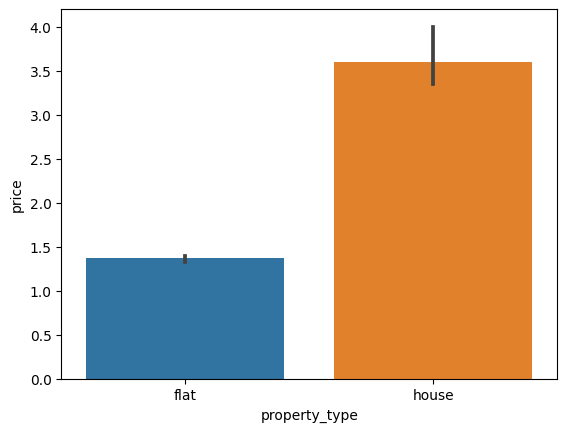

In [ ]:
sns.barplot(data, x=data['property_type'], y=data['price'], estimator=np.median)

##### Scatter Plot for (area and avgRating) vs. Price:

In [ ]:
# Set the desired precision for float values
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data.area.describe()

count      3941.00
mean       4647.03
std      117585.65
min          45.00
25%        1187.00
50%        1700.00
75%        2290.00
max     7250000.00
Name: area, dtype: float64

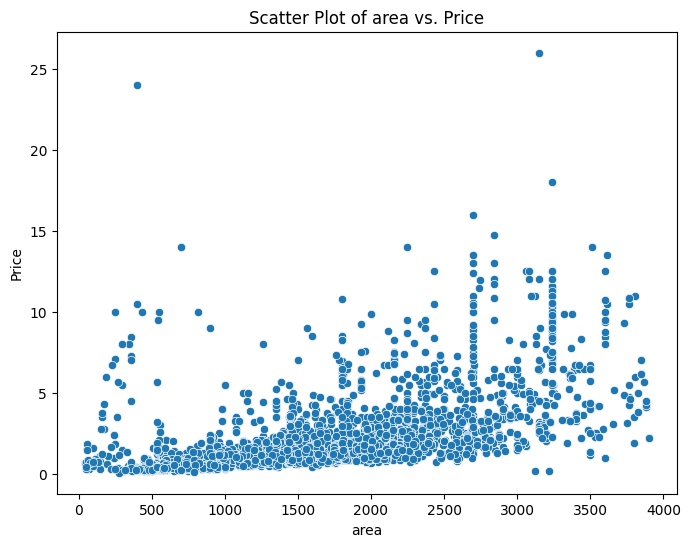

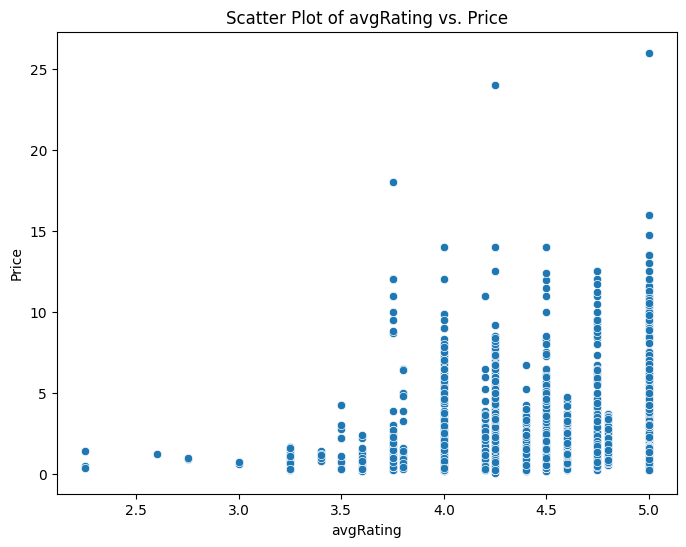

In [ ]:
# Specify the column you want to filter by (e.g., 'price' column)
column_to_filter = 'area'

# Define the IQR (Interquartile Range) boundaries to identify outliers
Q1 = data[column_to_filter].quantile(0.25)
Q3 = data[column_to_filter].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds to filter outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to exclude outliers
filtered_data = data[(data[column_to_filter] >= lower_bound) & (data[column_to_filter] <= upper_bound)]

# Select numeric features
numeric_features = ['area', 'avgRating']

# Create scatter plots
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=filtered_data, x=feature, y='price')
    plt.title(f'Scatter Plot of {feature} vs. Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

#### Scatter Plot area vs price (hue on different features)

In [ ]:
features = ['airport', 'station', 'banks', 'malls', 'educational_institutes', 'has_swimming_pool', 'has_security_alarm', 'has_gym', 'has_park', 'has_parking', 'has_water_storage', 'Modular Kitchen', 'Bed', 'Washing Machine', 'TV', 'Stove', 'Sofa', 'Fridge', 'Microwave', 'Dining Table', 'Water Purifier', 'Wardrobe', 'Curtains', 'Chimney', 'AC', 'Light', 'Geyser', 'Exhaust Fan', 'Fan']

for col in features:
  sns.scatterplot(data=filtered_data, x='area', y='price', hue=col,  palette='Set1')
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

##### Sector Analysis

<Axes: xlabel='sector', ylabel='property_type'>

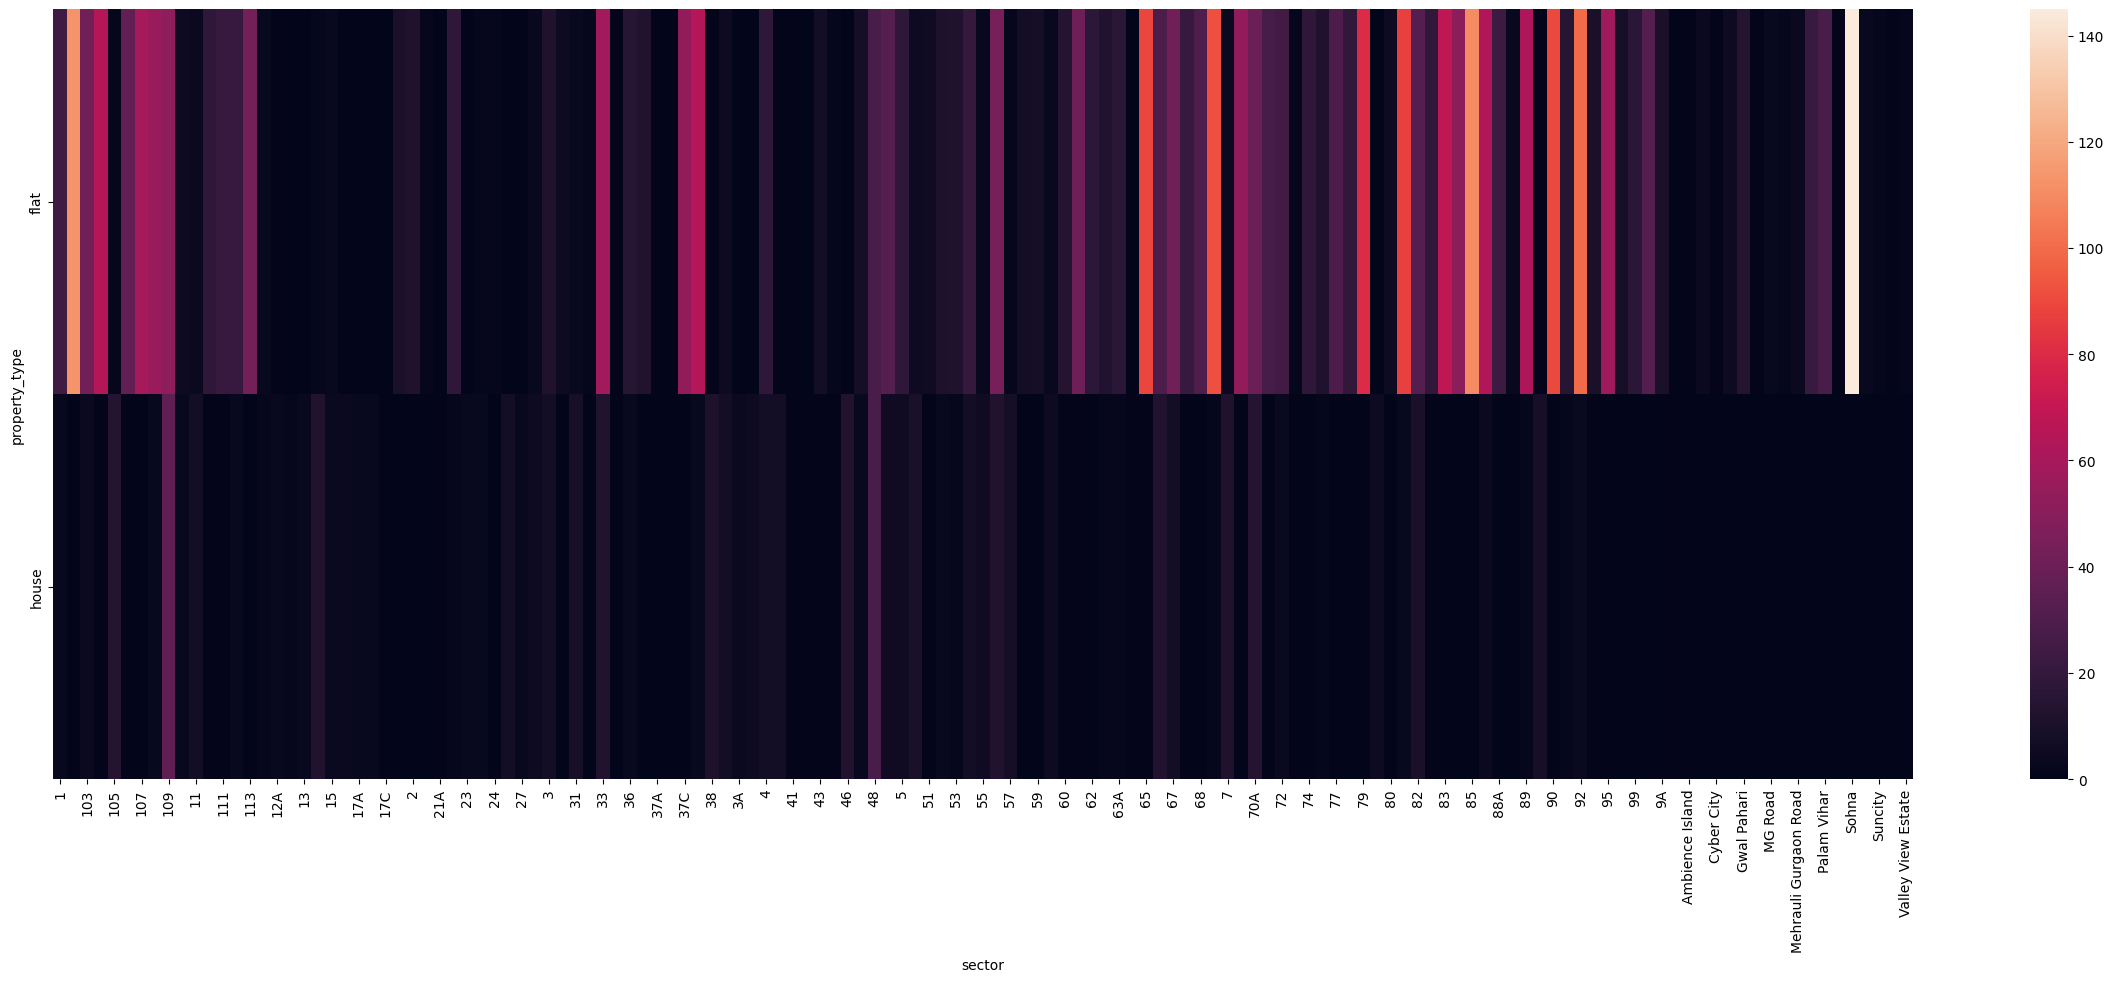

In [ ]:
plt.figure(figsize=(30,10))
sns.heatmap(pd.crosstab(data['property_type'],data['sector'].sort_index()))

##### Analysis

<Axes: xlabel='has_swimming_pool', ylabel='property_type'>

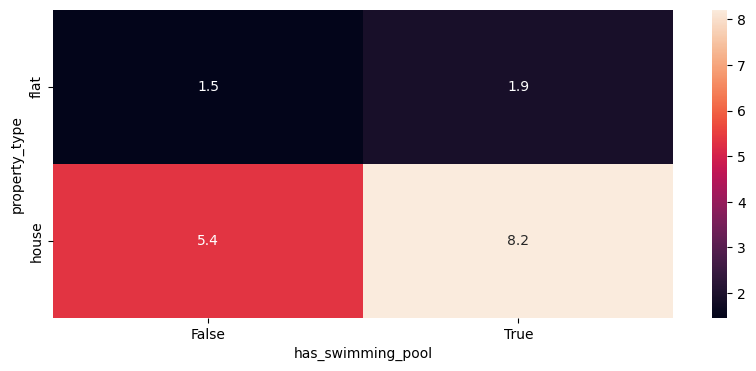

In [ ]:
plt.figure(figsize=(10,4))
sns.heatmap(pd.pivot_table(data,index='property_type',columns='has_swimming_pool',values='price',aggfunc='mean'),annot=True)

## To be continued....